<a href="https://www.kaggle.com/code/sayyedfarrukhmehmood/chatbot-arena-eda-and-text-processing-guide?scriptVersionId=178529358" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

I have followed the exploratory data analysis (EDA) and text processing techniques outlined in [this notebook](https://www.kaggle.com/code/ahsuna123/research-book-data-visualization) for my analysis.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## Loading data

In [4]:
train = pd.read_csv('/kaggle/input/lmsys-chatbot-arena/train.csv')
test=pd.read_csv('/kaggle/input/lmsys-chatbot-arena/test.csv')

## Configuration

In [6]:

class configuration:
    train_pkld_path='/kaggle/working/train.pkl'

    
cfg = configuration()

## Exploring Data

In [15]:
train.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,morally right try certain percentage females m...,question whether morally right aim certain per...,ai dont personal beliefs opinions however tell...,1,0,0
1,53567,koala-13b,gpt-4-0613,difference marriage license marriage certifica...,marriage license legal document allows couple ...,marriage license marriage certificate two diff...,0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,explain function calling would call function,function calling process invoking executing fu...,function calling process invoking function pro...,0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,create test set rare category want build class...,creating test set rare category challenging ma...,building classifier rare category creating tes...,1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,best way travel telaviv jerusalem car bus plane,best way travel tel aviv jerusalem depends per...,best way travel telaviv jerusalem depends pers...,0,1,0


`.describe()` attribute of `train` dataframe indicates same count for all the columns which is equal to the number of rows of dataframe. Hence, the dataframe has no missing values

In [16]:
train.describe()

,id,winner_model_a,winner_model_b,winner_tie
count,5.747700e+04,57477.000000,57477.000000,57477.000000
mean,2.142564e+09,0.349079,0.341911,0.309011
std,1.238327e+09,0.476683,0.474354,0.462090
min,3.019200e+04,0.000000,0.000000,0.000000
25%,1.071821e+09,0.000000,0.000000,0.000000
50%,2.133658e+09,0.000000,0.000000,0.000000
75%,3.211645e+09,1.000000,1.000000,1.000000
max,4.294947e+09,1.000000,1.000000,1.000000


## Exploring the LLMs

We have a set of 64 different LLMs. For each instance or prompt, two of the LLMs are selected for comparing their responses.


In [7]:
models=['model_a', 'model_b']
for col in models:
    print(col + ':',train[col].nunique()) 

model_a: 64
model_b: 64


In [9]:
# to determine whether the models are taken from the same set of 64 LLMs
sorted(set(train.model_a))==sorted(set(train.model_b))

True

In [26]:
# Duplicate respones from 'model_a'
print(train[train['response_a'].duplicated()].response_a)

481                                                product
581                                                       
650                                                       
672                               im sorry fulfill request
823      im able help im language model believe error p...
                               ...                        
57462                      math book unhappy many problems
57463                                        numbers quote
57464                                    sarah two sisters
57468    trained understand respond subset languages ti...
57476                                               apples
Name: response_a, Length: 1300, dtype: object


In [27]:
# Duplicate respones from 'model_b'
print(train[train['response_a'].duplicated()].response_b)

481      okay stepbystep workings x x factorizing x x d...
581                                                       
650      things could try improve code add comments exp...
672      possible woman born adult time newborn baby he...
823      napoleone bonaparte ue stato un soldato e poli...
                               ...                        
57462    course heres joke respectful safe positive cou...
57463                                                     
57464                                     sarah one sister
57468    possible bewerbungsanschreiben deutsch job adv...
57476    three kids eat three apples three days kid eat...
Name: response_b, Length: 1300, dtype: object


## Distribution of target variables
We have three target variables: winner_model_a, winner_model_b, winner_tie. We intend to know frequency of the winns of model_a, model_b and ties.

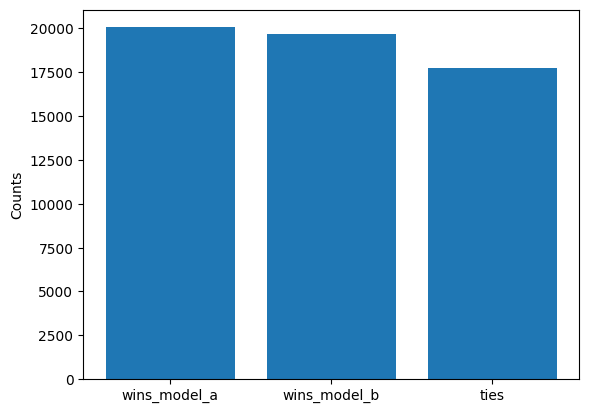

winner_model_a    20064
winner_model_b    19652
winner_tie        17761
dtype: int64


In [28]:
wins = ['wins_model_a', 'wins_model_b','ties']
plt.bar(x=wins, height=train[['winner_model_a', 'winner_model_b', 'winner_tie']].sum())
plt.ylabel('Counts')
plt.show()

print(train[['winner_model_a', 'winner_model_b', 'winner_tie']].sum())

## Text Prerpocessing

In [29]:
if not cfg.train_pkld_path:
    # import libraries for text processing
    import nltk
    from nltk.corpus import stopwords
    import string
    from tqdm import tqdm
    # Create a function to process the text
    def process_text(text):
        # lower case
        text = text.lower()
        # '\\n' character removed:
        text=text.replace("\\n"," " )
        # remove punctuation
        text = "".join([char for char in text if char not in string.punctuation])
        # remove digits
        text = ''.join([char for char in text if char not in string.digits])
        # remove stopwords
        stop_words = stopwords.words('english')
        words = nltk.word_tokenize(text)
        filtered_words =[word for word in words if word not in stop_words]
        filtered_text = " ".join(filtered_words)
        return filtered_text

    # applying the processing techniques
    tqdm.pandas()
    train['prompt'] = train['prompt'].progress_apply(process_text)
    train['response_a'] = train['response_a'].progress_apply(process_text)
    train['response_b'] = train['response_b'].progress_apply(process_text)
    # pickling the dataframe
    train.to_pickle('train.pkl')
    
else:
    train = pd.read_pickle(cfg.train_pkld_path)

## Common Words